## 1. Iris 데이터셋을 활용해 클래스별 변수 평균 차이를 검정

In [4]:
# 1
import seaborn as sns
iris = sns.load_dataset('iris')

In [7]:
print(iris.head(10))

print(iris.info())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  1

In [ ]:
# 2
result = iris.groupby('species')['petal_length'].describe()

print(result)


            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9


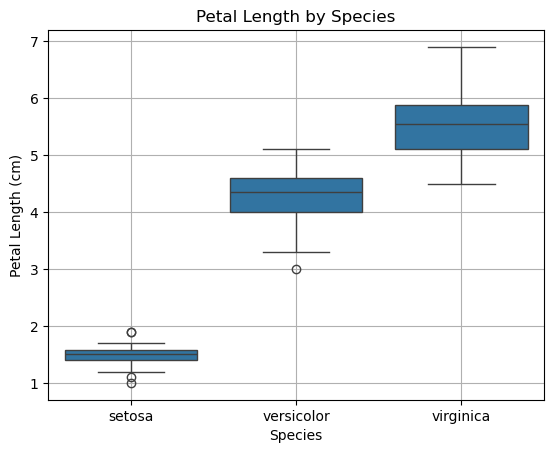

In [ ]:
# 3
import matplotlib.pyplot as plt

sns.boxplot(data=iris, x='species', y='petal_length')

plt.title('Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.grid(True)
plt.show()

- Virginica 그룹의 평균 및 중앙값이 가장 높다.
- setosa 그룹의 평균 및 중앙값이 가장 낮다.
- versicolor Species의 최댓값이 Virginica의 최솟값보다 크다.

In [ ]:
# 4
from scipy.stats import shapiro

# species별로 p-value만 출력
species_list = iris['species'].unique()

for species in species_list:
    data = iris[iris['species'] == species]['petal_length']
    _, p = shapiro(data)
    print(f"{species}: p-value = {p:.4f}")

setosa: p-value = 0.0548
versicolor: p-value = 0.1585
virginica: p-value = 0.1098


- setosa의 p-value가 0.05 이상이므로 귀무가설을 기각할 수 없다. 즉 정규성을 만족한다.
- versicolor의의 p-value가 0.05 이상이므로 귀무가설을 기각할 수 없다. 즉 정규성을 만족한다.
- virginica의의 p-value가 0.05 이상이므로 귀무가설을 기각할 수 없다. 즉 정규성을 만족한다.

In [12]:
# 5
import seaborn as sns
from scipy.stats import levene


# 각 그룹의 petal_length 추출
setosa = iris[iris['species'] == 'setosa']['petal_length']
versicolor = iris[iris['species'] == 'versicolor']['petal_length']
virginica = iris[iris['species'] == 'virginica']['petal_length']

# Levene 검정 수행
stat, p = levene(setosa, versicolor, virginica)

# p-value만 출력
print(f"Levene test p-value = {p:.10f}")


Levene test p-value = 0.0000000313


- Levene test 결과 p-value 값이 0.0000000313으로 0.05보다 훨씬 작으므로, 등분산성을 만족하지 않습니다.


\# 6
- H₀: 3개 Species 간 분산이 같다.
- H₁: 적어도 한 Species의 분산이 다르다.

In [32]:
# 7

from scipy.stats import f_oneway

# 각 그룹의 petal_length 추출
setosa = iris[iris['species'] == 'setosa']['petal_length']
versicolor = iris[iris['species'] == 'versicolor']['petal_length']
virginica = iris[iris['species'] == 'virginica']['petal_length']

# ANOVA 실행
f_stat, p_value = f_oneway(setosa, versicolor, virginica)

# 출력
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value}")

F-statistic: 1180.1612
p-value: 2.8567766109615584e-91


- 유의수준 0.05에서 p-value < 0.05이므로, 귀무가설을 기각한다.
- 따라서 세 species 간 petal_length의 평균에는 유의미한 차이가 있다.

In [33]:
# 8
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD 수행
tukey = pairwise_tukeyhsd(endog=iris['petal_length'], groups=iris['species'], alpha=0.05)

# 결과 출력
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


- 모든 그룹쌍 사이의 p-adj 값이 0.0으로 0.05보다 작으며 reject = true인 것을 통해
세 종 사이의 petal_length 평균에 유의미한 차이가 존재한다고 볼 수 있다.
- setosa vs versicolor / setosa vs virginica / versicolor vs virginica 모두 유의미한 차이를 가진다.

\# 9

- Boxplot 및 ANOVA 결과, 세 종(setosa, versicolor, virginica) 간의 petal length 평균에는 통계적으로 유의미한 차이가 있음을 알 수 있다.

- Tukey HSD 사후검정 결과, 모든 그룹 쌍(setosa–versicolor, setosa–virginica, versicolor–virginica) 간에 유의미한 차이가 존재함을 확인할 수 있다.

- 세 그룹 중 virginica가 가장 긴 petal length를 보였으며, setosa는 가장 짧은 petal length를 가진다고 할 수 있다.


---

## 2. 실제 신용카드 사기 데이터셋을 활용해 클래스 불균형 상황에서 분류 모델을 학습

In [61]:
# 1
import pandas as pd

df = pd.read_csv('C:/creditcard.csv',  encoding='cp949')

print(df.head())

print(df.info())

print(df.describe())

# Class 비율 출력 (0: 정상, 1: 사기)
print(df['Class'].value_counts()) 
print(df['Class'].value_counts(normalize=True)) 


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [62]:
# 2

# 사기 거래(Class=1) 전부 유지
fraud = df[df['Class'] == 1]

# 정상 거래(Class=0)에서 10,000건 샘플링
normal = df[df['Class'] == 0].sample(n=10000, random_state=42)

# 두 데이터 결합
sampled_df = pd.concat([fraud, normal], axis=0)

# 5. 샘플링 후 Class 비율 출력
print(sampled_df['Class'].value_counts(normalize=True))

Class
0    0.953107
1    0.046893
Name: proportion, dtype: float64


In [63]:
# 3

from sklearn.preprocessing import StandardScaler

# 1. StandardScaler 객체 생성
scaler = StandardScaler()

# 2. Amount 변수만 표준화
sampled_df['Amount_Scaled'] = scaler.fit_transform(sampled_df[['Amount']])

# 3. 원래 Amount 변수 삭제
sampled_df = sampled_df.drop('Amount', axis=1)

# 4. X, y 분리
X = sampled_df.drop('Class', axis=1)
y = sampled_df['Class'] 

In [64]:
# 4
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 비율 확인
print("Train Class 분포:")
print(y_train.value_counts())
print("\n")
print("Test Class 분포:")
print(y_test.value_counts())


Train Class 분포:
Class
0    7999
1     394
Name: count, dtype: int64


Test Class 분포:
Class
0    2001
1      98
Name: count, dtype: int64


In [66]:
# 5

from imblearn.over_sampling import SMOTE

# SMOTE 객체 생성
smote = SMOTE(random_state=42)

# 학습 데이터에 SMOTE 적용
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 사기 거래 건수 확인
print("SMOTE 적용 전 Class 분포:")
print(y_train.value_counts())
print('\n')
print("SMOTE 적용 후 Class 분포:")
print(y_train_resampled.value_counts())

SMOTE 적용 전 Class 분포:
Class
0    7999
1     394
Name: count, dtype: int64


SMOTE 적용 후 Class 분포:
Class
0    7999
1    7999
Name: count, dtype: int64


In [70]:
# 6

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, average_precision_score

# 로지스틱 회귀 모델 정의 및 학습
model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# 예측
y_proba = model.predict_proba(X_test)[:, 1]  # Class=1일 확률
threshold = 0.8
y_pred_thresh = (y_proba >= threshold).astype(int)

# 예측값과 예측 확률 출력
print("예측 확률 (Class=1):")
print(y_proba[:10])  # 처음 10개만 출력

print("\n예측 결과 :")
print(y_pred_thresh[:10])  # 처음 10개만 출력

# classification_report 출력
print("Classification Report:")
print(classification_report(y_test, y_pred_thresh, digits=4))

# PR-AUC
pr_auc = average_precision_score(y_test, y_proba) 
print(f"\nPR-AUC (average_precision_score): {pr_auc:.4f}")

예측 확률 (Class=1):
[0.14013283 0.07740872 0.03678127 0.02188825 0.29228138 0.00212237
 1.         0.00716832 0.00123913 0.0144795 ]

예측 결과 :
[0 0 0 0 0 0 1 0 0 0]
Classification Report:
              precision    recall  f1-score   support

           0     0.9940    0.9965    0.9953      2001
           1     0.9247    0.8776    0.9005        98

    accuracy                         0.9909      2099
   macro avg     0.9594    0.9370    0.9479      2099
weighted avg     0.9908    0.9909    0.9908      2099


PR-AUC (average_precision_score): 0.9551


- 로지스틱 회귀 모델을 사용하였고, max_iter=5000으로, threshold=0.8로 조정한 결과 테스트셋에 대한 성능은 다음과 같다.

- Class 0의 precision은 0.9940, recall은 0.9965, f1-score는 0.9953이며
Class 1의 precision은 0.9247, recall은 0.8776, f1-score는 0.9005로 둘 다 목표를 달성하였다.

- 전체 모델의 PR-AUC=0.9551로 역시 목표를 달성하였다.